## Assignment
Find a data set and build a KNN Regression and an OLS regression. Compare the two. How similar are they? Do they miss in different ways?

Create a Jupyter notebook with your models. At the end in a markdown cell write a few paragraphs to describe the models' behaviors and why you favor one model or the other. Try to determine whether there is a situation where you would change your mind, or whether one is unambiguously better than the other. Lastly, try to note what it is about the data that causes the better model to outperform the weaker model. Submit a link to your notebook below.

In [25]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import neighbors
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf

In [8]:
# Iris dataset from https://www.kaggle.com/arshid/iris-flower-dataset/data
iris = pd.read_csv('~/Desktop/Data_Science/IRIS.csv')

In [9]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### KNN Regression

In [10]:
# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
X = iris[['sepal_width', 'petal_length', 'petal_width']]
Y = iris['sepal_length']
knn.fit(X, Y)

#use cross validation to test
score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Unweighted Accuracy: 0.52 (+/- 0.39)


In [12]:
# Test smaller k
knn = neighbors.KNeighborsRegressor(n_neighbors=5)
X = iris[['sepal_width', 'petal_length', 'petal_width']]
Y = iris['sepal_length']
knn.fit(X, Y)

#use cross validation to test
score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Unweighted Accuracy: 0.53 (+/- 0.47)


In [13]:
# Test distance weighted model
knn = neighbors.KNeighborsRegressor(n_neighbors=5, weights='distance')
X = iris[['sepal_width', 'petal_length', 'petal_width']]
Y = iris['sepal_length']
knn.fit(X, Y)

#use cross validation to test
score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Unweighted Accuracy: 0.55 (+/- 0.45)


Not very good accuracy, let's see what we can do with Ordinary Least Squares Regression

### OLS Regression

SKLearn

In [11]:
#write model
regr = linear_model.LinearRegression()
Y = iris['sepal_length'].values.reshape(-1, 1)
X = iris[['sepal_width', 'petal_length', 'petal_width']]
regr.fit(X, Y)

print('\nR-squared:')
print(regr.score(X, Y))


R-squared:
0.8592166649106592


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


StatsModel

In [28]:
#write model
linear_formula = 'sepal_length ~ sepal_width+petal_length+petal_width'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=iris).fit()

#test model for R-squared value
print('R-squared value:\n', lm.rsquared)

R-squared value:
 0.8592166649106592


Both packages return the same result.

### Comparison

A first look as the results from these models indicates that OLS is better than KNN with much higher accuracy (0.86 over 0.55).  Let's take a look at individual Cross Validation Scores to see how they compare.

In [31]:
#cross validation test for KNN
print('\nKNN Cross Validation Score:', cross_val_score(knn, X, Y, cv=10))

#cross validation test for OLS
print('\nOLS Cross Validation Score:', cross_val_score(regr, X, Y, cv=10))


KNN Cross Validation Score: [0.41696027 0.21477319 0.57636408 0.76226739 0.46723674 0.54769981
 0.6236504  0.63021263 0.70265736 0.37285104]

OLS Cross Validation Score: [0.63086579 0.38878195 0.22700745 0.8565237  0.262479   0.40395639
 0.59592532 0.8416528  0.7995874  0.09678229]


The average accuracy for OLS looks much better than KNN, but Cross Validation scores (with ten folds) for each method show different results.  The range for KNN is 0.547 (from 0.215 to 0.762).  The range for OLS is 0.760 (0.097 to 0.857)

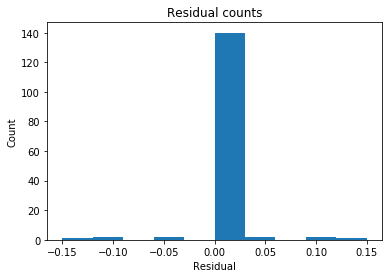

In [37]:
# Extract predicted values.
predicted = knn.predict(X).ravel()
actual = iris['sepal_length']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

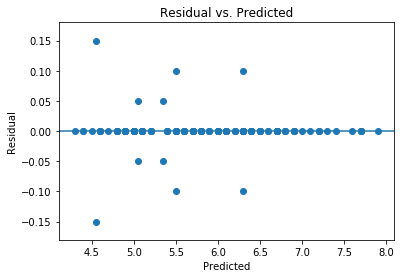

In [38]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

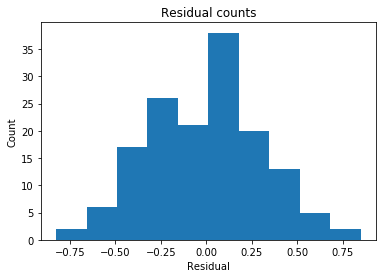

In [35]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = iris['sepal_length']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

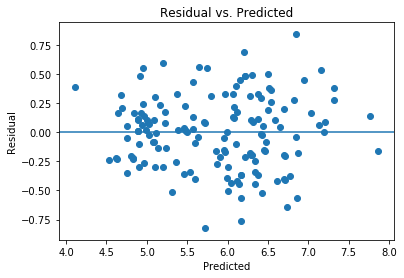

In [36]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()